In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("Bengaluru_House_Data.csv")

In [3]:
df.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [4]:
df.shape


(13320, 9)

In [5]:
df.info

<bound method DataFrame.info of                   area_type   availability                  location  \
0      Super built-up  Area         19-Dec  Electronic City Phase II   
1                Plot  Area  Ready To Move          Chikka Tirupathi   
2            Built-up  Area  Ready To Move               Uttarahalli   
3      Super built-up  Area  Ready To Move        Lingadheeranahalli   
4      Super built-up  Area  Ready To Move                  Kothanur   
...                     ...            ...                       ...   
13315        Built-up  Area  Ready To Move                Whitefield   
13316  Super built-up  Area  Ready To Move             Richards Town   
13317        Built-up  Area  Ready To Move     Raja Rajeshwari Nagar   
13318  Super built-up  Area         18-Jun           Padmanabhanagar   
13319  Super built-up  Area  Ready To Move              Doddathoguru   

            size  society total_sqft  bath  balcony   price  
0          2 BHK  Coomee        1056   2.

In [6]:
for column in df.columns:
    print(df[column].value_counts())
    print("*"*20)

Super built-up  Area    8790
Built-up  Area          2418
Plot  Area              2025
Carpet  Area              87
Name: area_type, dtype: int64
********************
Ready To Move    10581
18-Dec             307
18-May             295
18-Apr             271
18-Aug             200
                 ...  
15-Aug               1
17-Jan               1
16-Nov               1
16-Jan               1
14-Jul               1
Name: availability, Length: 81, dtype: int64
********************
Whitefield                        540
Sarjapur  Road                    399
Electronic City                   302
Kanakpura Road                    273
Thanisandra                       234
                                 ... 
Bapuji Layout                       1
1st Stage Radha Krishna Layout      1
BEML Layout 5th stage               1
singapura paradise                  1
Abshot Layout                       1
Name: location, Length: 1305, dtype: int64
********************
2 BHK         5199
3 BHK        

In [7]:
df.isna().sum()

area_type          0
availability       0
location           1
size              16
society         5502
total_sqft         0
bath              73
balcony          609
price              0
dtype: int64

In [8]:
df.drop(columns=['area_type','availability','balcony'],inplace=True)

In [9]:
df.describe()

,bath,price
count,13247.000000,13320.000000
mean,2.692610,112.565627
std,1.341458,148.971674
min,1.000000,8.000000
25%,2.000000,50.000000
50%,2.000000,72.000000
75%,3.000000,120.000000
max,40.000000,3600.000000


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   location    13319 non-null  object 
 1   size        13304 non-null  object 
 2   society     7818 non-null   object 
 3   total_sqft  13320 non-null  object 
 4   bath        13247 non-null  float64
 5   price       13320 non-null  float64
dtypes: float64(2), object(4)
memory usage: 624.5+ KB


In [11]:
df['location'].value_counts()

Whitefield                        540
Sarjapur  Road                    399
Electronic City                   302
Kanakpura Road                    273
Thanisandra                       234
                                 ... 
Bapuji Layout                       1
1st Stage Radha Krishna Layout      1
BEML Layout 5th stage               1
singapura paradise                  1
Abshot Layout                       1
Name: location, Length: 1305, dtype: int64

In [12]:
df['location']=df['location'].fillna("Sarjapur Road")

In [13]:
df['size'].value_counts()

2 BHK         5199
3 BHK         4310
4 Bedroom      826
4 BHK          591
3 Bedroom      547
1 BHK          538
2 Bedroom      329
5 Bedroom      297
6 Bedroom      191
1 Bedroom      105
8 Bedroom       84
7 Bedroom       83
5 BHK           59
9 Bedroom       46
6 BHK           30
7 BHK           17
1 RK            13
10 Bedroom      12
9 BHK            8
8 BHK            5
11 BHK           2
11 Bedroom       2
10 BHK           2
14 BHK           1
13 BHK           1
12 Bedroom       1
27 BHK           1
43 Bedroom       1
16 BHK           1
19 BHK           1
18 Bedroom       1
Name: size, dtype: int64

In [14]:
df['size']=df['size'].fillna('2 BHK')

In [15]:
df['bath']=df['bath'].fillna(df['bath'].median())


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   location    13320 non-null  object 
 1   size        13320 non-null  object 
 2   society     7818 non-null   object 
 3   total_sqft  13320 non-null  object 
 4   bath        13320 non-null  float64
 5   price       13320 non-null  float64
dtypes: float64(2), object(4)
memory usage: 624.5+ KB


In [17]:
df['bhk']=df['size'].str.split().str.get(0).astype(int)

In [18]:
df[df.bhk>20]

,location,size,society,total_sqft,bath,price,bhk
1718,2Electronic City Phase II,27 BHK,NaN,8000,27.0,230.0,27
4684,Munnekollal,43 Bedroom,NaN,2400,40.0,660.0,43


In [19]:
df['total_sqft'].unique()

array(['1056', '2600', '1440', ..., '1133 - 1384', '774', '4689'],
      dtype=object)

In [20]:
def convertRange(x):
    temp=x.split('-')
    if len(temp)==2:
        return (float(temp[0])*float(temp[1]))/2
    try:
        return float(x)
    except:
        return None

In [21]:
df['total_sqft']=df['total_sqft'].apply(convertRange)

In [22]:
df.head()

,location,size,society,total_sqft,bath,price,bhk
0,Electronic City Phase II,2 BHK,Coomee,1056.0,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,Theanmp,2600.0,5.0,120.00,4
2,Uttarahalli,3 BHK,NaN,1440.0,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,Soiewre,1521.0,3.0,95.00,3
4,Kothanur,2 BHK,NaN,1200.0,2.0,51.00,2


In [23]:
#Price Per Square Feet

In [24]:
df['price_per_sqft']=df['price']*100000/df['total_sqft']
df['price_per_sqft']

0         3699.810606
1         4615.384615
2         4305.555556
3         6245.890861
4         4250.000000
             ...     
13315     6689.834926
13316    11111.111111
13317     5258.545136
13318    10407.336319
13319     3090.909091
Name: price_per_sqft, Length: 13320, dtype: float64

In [25]:
df.describe()

,total_sqft,bath,price,bhk,price_per_sqft
count,1.327400e+04,13320.000000,13320.000000,13320.000000,1.327400e+04
mean,3.757339e+04,2.688814,112.565627,2.802778,7.829339e+03
std,4.748489e+05,1.338754,148.971674,1.294496,1.064333e+05
min,1.000000e+00,1.000000,8.000000,1.000000,1.180556e+00
25%,1.100000e+03,2.000000,50.000000,2.000000,4.210526e+03
50%,1.284000e+03,2.000000,72.000000,3.000000,5.412952e+03
75%,1.700000e+03,3.000000,120.000000,3.000000,7.288013e+03
max,1.606028e+07,40.000000,3600.000000,43.000000,1.200000e+07


In [26]:
df['location'].value_counts()

Whitefield                        540
Sarjapur  Road                    399
Electronic City                   302
Kanakpura Road                    273
Thanisandra                       234
                                 ... 
1st Stage Radha Krishna Layout      1
BEML Layout 5th stage               1
singapura paradise                  1
Uvce Layout                         1
Abshot Layout                       1
Name: location, Length: 1306, dtype: int64

In [27]:
df['loaction']=df['location'].apply(lambda x:x.strip())
location_count=df['location'].value_counts()

In [28]:
location_count_less_10=location_count[location_count<=10]
location_count_less_10

Nagappa Reddy Layout              10
BTM 1st Stage                     10
1st Block Koramangala             10
Kalkere                           10
Naganathapura                     10
                                  ..
1st Stage Radha Krishna Layout     1
BEML Layout 5th stage              1
singapura paradise                 1
Uvce Layout                        1
Abshot Layout                      1
Name: location, Length: 1065, dtype: int64

In [29]:
df['location']=df['location'].apply(lambda x: 'other' if x in location_count_less_10 else x)

In [30]:
df['location'].value_counts()

other                 2901
Whitefield             540
Sarjapur  Road         399
Electronic City        302
Kanakpura Road         273
                      ... 
Marsur                  11
Banjara Layout          11
LB Shastri Nagar        11
Pattandur Agrahara      11
Narayanapura            11
Name: location, Length: 242, dtype: int64

In [31]:
#Outlier Detection and Removal

In [32]:
df.describe()

,total_sqft,bath,price,bhk,price_per_sqft
count,1.327400e+04,13320.000000,13320.000000,13320.000000,1.327400e+04
mean,3.757339e+04,2.688814,112.565627,2.802778,7.829339e+03
std,4.748489e+05,1.338754,148.971674,1.294496,1.064333e+05
min,1.000000e+00,1.000000,8.000000,1.000000,1.180556e+00
25%,1.100000e+03,2.000000,50.000000,2.000000,4.210526e+03
50%,1.284000e+03,2.000000,72.000000,3.000000,5.412952e+03
75%,1.700000e+03,3.000000,120.000000,3.000000,7.288013e+03
max,1.606028e+07,40.000000,3600.000000,43.000000,1.200000e+07


In [33]:
(df['total_sqft']/df['bhk']).describe()

count    1.327400e+04
mean     1.137245e+04
std      1.229315e+05
min      2.500000e-01
25%      4.750000e+02
50%      5.540000e+02
75%      6.280000e+02
max      4.015069e+06
dtype: float64

In [34]:
df=df[((df['total_sqft']/df['bhk'])>=300)]
df.price_per_sqft.describe()

count     12530.000000
mean       6221.175764
std        4228.849601
min           1.180556
25%        4166.666667
50%        5267.448444
75%        6896.551724
max      176470.588235
Name: price_per_sqft, dtype: float64

In [35]:
def remove_outlier_sqft(df):
    df_output=pd.DataFrame()
    for key,subdf in df.groupby('location'):
        m=np.mean(subdf.price_per_sqft)
        st=np.std(subdf.price_per_sqft)
        
        gen_df=subdf[(subdf.price_per_sqft>(m-st))&(subdf.price_per_sqft<=(m+st))]
        df_output=pd.concat([df_output,gen_df],ignore_index=True)
    return df_output
df=remove_outlier_sqft(df)
df.describe()


,total_sqft,bath,price,bhk,price_per_sqft
count,10427.00000,10427.000000,10427.000000,10427.000000,10427.000000
mean,1498.74495,2.468783,90.294388,2.571018,5633.910543
std,867.92764,0.970927,85.644841,0.892675,2272.354830
min,300.00000,1.000000,9.000000,1.000000,1250.000000
25%,1108.00000,2.000000,48.080000,2.000000,4199.862259
50%,1280.00000,2.000000,66.000000,2.000000,5147.058824
75%,1644.00000,3.000000,100.000000,3.000000,6423.670267
max,30400.00000,16.000000,2200.000000,16.000000,24509.803922


In [36]:
def bhk_outlier_remover(df):
    exclude_indices=np.array([])
    for location,location_df in df.groupby('location'):
        bhk_stats={}
        for bhk,bhk_df in location_df.groupby('bhk'):
            bhk_stats[bhk]={
                'mean':np.mean(bhk_df.price_per_sqft),
                'std':np.std(bhk_df.price_per_sqft),
                'count':bhk_df.shape[0]
            }
        for bhk,bhk_df in location_df.groupby('bhk'):
            stats=bhk_stats.get(bhk-1)
            if stats and stats['count']>5:
                exclude_indices=np.append(exclude_indices,bhk_df[bhk_df.price_per_sqft<(stats['mean'])].index.values)
    return df.drop(exclude_indices,axis='index')

In [37]:
df=bhk_outlier_remover(df)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7442 entries, 1 to 10426
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   location        7442 non-null   object 
 1   size            7442 non-null   object 
 2   society         4838 non-null   object 
 3   total_sqft      7442 non-null   float64
 4   bath            7442 non-null   float64
 5   price           7442 non-null   float64
 6   bhk             7442 non-null   int32  
 7   price_per_sqft  7442 non-null   float64
 8   loaction        7442 non-null   object 
dtypes: float64(4), int32(1), object(4)
memory usage: 552.3+ KB


In [38]:
df.shape

(7442, 9)

In [39]:
df.drop(columns=['size','price_per_sqft', 'society'],inplace=True)
df

,location,total_sqft,bath,price,bhk,loaction
1,Devarachikkanahalli,1250.0,2.0,40.0,2,Devarachikkanahalli
2,Devarachikkanahalli,1200.0,2.0,83.0,2,Devarachikkanahalli
3,Devarachikkanahalli,1170.0,2.0,40.0,2,Devarachikkanahalli
4,Devarachikkanahalli,1425.0,2.0,65.0,3,Devarachikkanahalli
5,Devarachikkanahalli,947.0,2.0,43.0,2,Devarachikkanahalli
...,...,...,...,...,...,...
10418,other,1200.0,2.0,70.0,2,Hennur Bande
10419,other,1800.0,1.0,200.0,1,12th cross srinivas nagar banshankari 3rd stage
10422,other,1353.0,2.0,110.0,2,VHBCS Layout
10423,other,812.0,1.0,26.0,1,Weavers Colony


In [40]:
df

,location,total_sqft,bath,price,bhk,loaction
1,Devarachikkanahalli,1250.0,2.0,40.0,2,Devarachikkanahalli
2,Devarachikkanahalli,1200.0,2.0,83.0,2,Devarachikkanahalli
3,Devarachikkanahalli,1170.0,2.0,40.0,2,Devarachikkanahalli
4,Devarachikkanahalli,1425.0,2.0,65.0,3,Devarachikkanahalli
5,Devarachikkanahalli,947.0,2.0,43.0,2,Devarachikkanahalli
...,...,...,...,...,...,...
10418,other,1200.0,2.0,70.0,2,Hennur Bande
10419,other,1800.0,1.0,200.0,1,12th cross srinivas nagar banshankari 3rd stage
10422,other,1353.0,2.0,110.0,2,VHBCS Layout
10423,other,812.0,1.0,26.0,1,Weavers Colony


In [41]:
df.head()

,location,total_sqft,bath,price,bhk,loaction
1,Devarachikkanahalli,1250.0,2.0,40.0,2,Devarachikkanahalli
2,Devarachikkanahalli,1200.0,2.0,83.0,2,Devarachikkanahalli
3,Devarachikkanahalli,1170.0,2.0,40.0,2,Devarachikkanahalli
4,Devarachikkanahalli,1425.0,2.0,65.0,3,Devarachikkanahalli
5,Devarachikkanahalli,947.0,2.0,43.0,2,Devarachikkanahalli


In [42]:
#create independent and dependent data

In [43]:
df.isna().sum()

location      0
total_sqft    0
bath          0
price         0
bhk           0
loaction      0
dtype: int64

In [60]:
x=df.iloc[:,[1,2,4 ]].values
y=df['price']
print(x,y)

[[1.250e+03 2.000e+00 2.000e+00]
 [1.200e+03 2.000e+00 2.000e+00]
 [1.170e+03 2.000e+00 2.000e+00]
 ...
 [1.353e+03 2.000e+00 2.000e+00]
 [8.120e+02 1.000e+00 1.000e+00]
 [3.600e+03 5.000e+00 4.000e+00]] 1         40.0
2         83.0
3         40.0
4         65.0
5         43.0
         ...  
10418     70.0
10419    200.0
10422    110.0
10423     26.0
10426    400.0
Name: price, Length: 7442, dtype: float64


In [61]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

In [62]:
from sklearn.preprocessing import StandardScaler
st=StandardScaler()
x_train=st.fit_transform(x_train)
x_test=st.transform(x_test)

In [63]:
print(np.isnan(x_train).sum())
print(np.isnan(y_train).sum())

0
0


In [64]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(x_train,y_train)


LinearRegression()

In [65]:
y_pred=lr.predict(x_test)

In [71]:
val = np.array([122, 2, 2])
val = np.reshape(val, (1, -1))

In [72]:
ans = lr.predict(val)

In [73]:
print(ans)

[9689.68413257]


In [74]:
df.head()

,location,total_sqft,bath,price,bhk,loaction
1,Devarachikkanahalli,1250.0,2.0,40.0,2,Devarachikkanahalli
2,Devarachikkanahalli,1200.0,2.0,83.0,2,Devarachikkanahalli
3,Devarachikkanahalli,1170.0,2.0,40.0,2,Devarachikkanahalli
4,Devarachikkanahalli,1425.0,2.0,65.0,3,Devarachikkanahalli
5,Devarachikkanahalli,947.0,2.0,43.0,2,Devarachikkanahalli


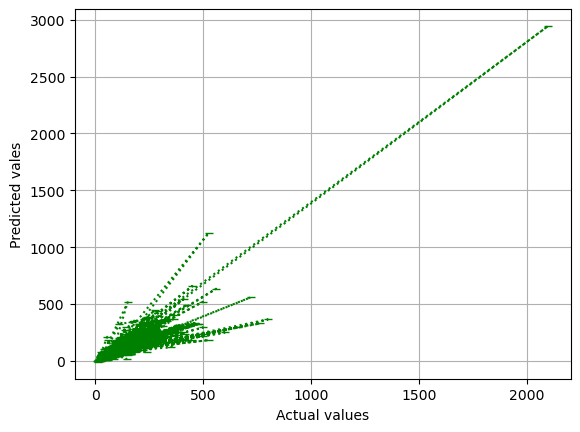

In [75]:
plt.grid()
plt.plot(y_test,y_pred,":_g")
plt.xlabel("Actual values")
plt.ylabel("Predicted vales")
plt.show()

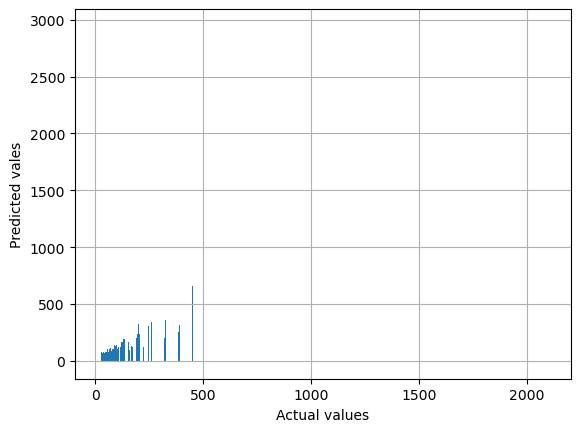

In [76]:
plt.grid()
plt.bar(y_test,y_pred)
plt.xlabel("Actual values")
plt.ylabel("Predicted vales")
plt.show()